# Poisson Simulation

This notebook aims to create a poisson simulation that is at first only simulating the arrival of a vehicle at a point in time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tick.base import TimeFunction

from tick.plot import plot_point_process
from tick.hawkes import SimuInhomogeneousPoisson
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=13)

C:\Users\Isabelle\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Looking at platoons 
station = 'Ceneri'
day_simulation(station, 'Saturday')

ValueError: setting an array element with a sequence.

In [5]:
def day_simulation(station, weekday):
    df = pd.read_pickle('{}Data/platoon_{}_seasonality.pkl'.format(station, 'Daily'))
    df_day = df.loc[df.index == weekday]
    df_day = df_day.groupby(['Hour'])

    run_time = 24 #minutes in a day

    tf = TimeFunction((df_day.Hour, df_day.norm_count), dt=0.00028)

    # We define a 1 dimensional inhomogeneous Poisson process with the
    # intensity function seen above
    in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

    # We activate intensity tracking and launch simulation
    in_poi.track_intensity(0.1)
    in_poi.simulate()

    # We plot the resulting inhomogeneous Poisson process with its
    # intensity and its ticks over time
    fig, axes = plt.subplots()
    plot_point_process(in_poi, ax=axes)
    axes.set_title('{} {} Inhomogeneous Natural Platoon > 2 Vehicles Poisson Simulation'.format(station, day))

    axes.yaxis.grid(True)
    axes.set_xlabel('Time (minutes)')
    axes.set_ylabel('Platoon intensity')


In [7]:
df = pd.read_pickle('{}Data/platoon_{}_seasonality.pkl'.format(station, 'Daily'))
day = 'Monday'
df_monday = df.loc[df.index == day]

In [8]:
df_monday = df_monday.groupby(['Hour'])

In [17]:
df_monday['Minute'] = df_monday['Minute'] + df_monday['Hour']*60

C:\Users\Isabelle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_monday.head()

seasonal_count  Hour  Minute  count  norm_count
Weekday                                                 
Monday              443     0       0      2    0.004515
Monday              443     0       1      3    0.006772
Monday              443     0       2      3    0.006772
Monday              443     0       3      1    0.002257
Monday              443     0       4      3    0.006772
...                 ...   ...     ...    ...         ...
Monday              443    23       0      2    0.004515
Monday              443    23       1      5    0.011287
Monday              443    23       2      3    0.006772
Monday              443    23       3      2    0.004515
Monday              443    23       4      6    0.013544

[120 rows x 5 columns]

Text(0, 0.5, 'Platoon intensity')

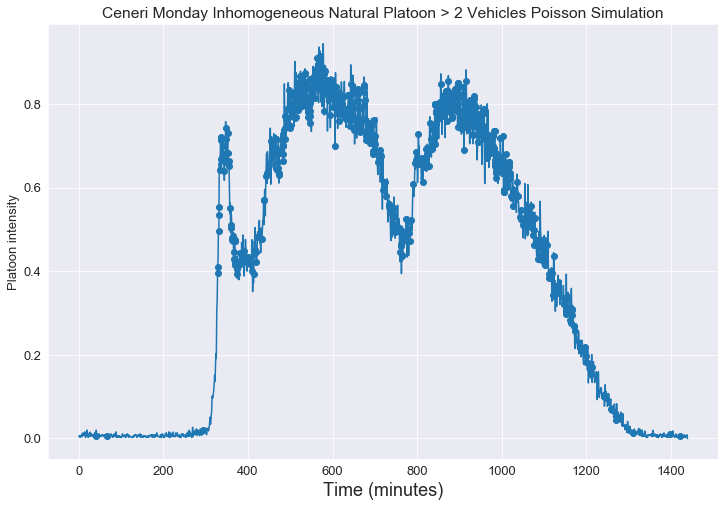

In [20]:

run_time = 1440 #minutes in a day

tf = TimeFunction((df_monday.Minute, df_monday.norm_count), dt=0.00028)

# We define a 1 dimensional inhomogeneous Poisson process with the
# intensity function seen above
in_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

# We activate intensity tracking and launch simulation
in_poi.track_intensity(0.1)
in_poi.simulate()

# We plot the resulting inhomogeneous Poisson process with its
# intensity and its ticks over time
fig, axes = plt.subplots()
plot_point_process(in_poi, ax=axes)
axes.set_title('{} {} Inhomogeneous Natural Platoon > 2 Vehicles Poisson Simulation'.format(station, day))

axes.yaxis.grid(True)
axes.set_xlabel('Time (minutes)')
axes.set_ylabel('Platoon intensity')
